In [1]:
# Reference for building Logistic Regression model: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd

In [2]:
# Please update the path to the activities.csv file from the repository
df = pd.read_csv('activities.csv')

In [3]:
df.head()

,Date,Name,Type,Moving Time,Distance (km),Elevation Gain (m),Avg Moving Speed (kph),Avg Pace (/km),Calories,Best 20min Speed (kph),...,HRSS / h,Best 20min HR (bpm),Cadence Avg Moving (rpm or spm),Avg Watts (w),Avg Watts / Kilograms (w/kg),Best 20min Power (w),Power Stress Score,Power Stress Score / h,Athlete Settings,Delete
0,2019-09-22T16:27:01-04:00,Último día de verano,Ride,01:58:06,62.5,589.0,31.7,01:53,1772,34,...,73,163,95,179,2.56,201,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
1,2019-09-21T11:57:23-04:00,Dos loops,Ride,02:38:51,80.1,890.0,28.7,02:05,2432,36.7,...,77,173,89,174,2.49,225,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
2,2019-09-20T17:55:47-04:00,Con poco tiempo,Ride,01:07:52,35.2,314.0,30.9,01:56,1029,34.5,...,76,163,91,169,2.42,188,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
3,2019-09-19T23:45:00-04:00,Complimentary calisthenics,Workout,01:00:00,0.0,0.0,-,-,-,-,...,-,-,-,-,-,-,-,-,Weight 70kg.,NaN
4,2019-09-18T17:41:48-04:00,Afternoon Ride,Ride,01:26:05,45.6,447.0,31.4,01:54,1326,36,...,81,173,97,181,2.59,221,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN


In [6]:
# Before feature pre-processing
df.describe()

,Distance (km),Elevation Gain (m)
count,573.000000,573.000000
mean,35.888656,620.718325
std,29.855291,601.756726
min,0.000000,0.000000
25%,9.300000,189.400000
50%,32.900000,526.000000
75%,51.900000,884.600000
max,170.600000,3617.000000


In [7]:
# Select features and rename columns
df = df[['Avg HR (bpm)','Date','Type','Distance (km)','Avg Pace (/km)','Calories','HRSS','Elevation Gain (m)']]
df = df.rename(columns={"Avg HR (bpm)": "AvgHR"})
df.head()

KeyError: "['Avg HR (bpm)'] not in index"

In [8]:
# Define features and pre-process data for final dataset
from dateutil.parser import parse
# Filter rows to include only those with AvgHR
df = df[df.AvgHR != '-']
# Only include Ride and VirtualRide types
types = ['Ride', 'VirtualRide']
df = df[df.Type.isin(types)]

df = df.reset_index(drop=True)
# Convert features to numbers
df["AvgHR"] = pd.to_numeric(df["AvgHR"])
df["Calories"] = pd.to_numeric(df["Calories"])
df["HRSS"] = pd.to_numeric(df["HRSS"])
df.head()
# Convert Avg Pace to seconds, parse Date and Time as separate columns
for i in range(df.shape[0]):
    #print('done')
    #print(df.loc[i,'Avg Pace (/km)'])
    (m, s) = str(df.loc[i,'Avg Pace (/km)']).split(':')
    df.loc[i,'Avg Pace (/km)']= (int(m) * 60) + int(s)
    dt = parse(df.loc[i,'Date'])
    df.loc[i,'Date'] = dt.date()
    df.loc[i,'Time'] = dt.time()
# Convert Avg Pace to number
df['Avg Pace (/km)'] = pd.to_numeric(df['Avg Pace (/km)'])

df.describe()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,155.032362,52.237540,150.624595,1573.423948,152.022654,888.765372
std,12.505282,27.117491,42.469105,848.025054,82.021593,650.796847
min,84.000000,1.400000,86.000000,48.000000,3.000000,0.000000
25%,149.000000,32.900000,119.000000,979.000000,98.000000,492.000000
50%,155.000000,50.100000,151.000000,1354.000000,128.000000,715.000000
75%,161.000000,60.400000,168.000000,1827.000000,187.000000,1128.900000
max,191.000000,170.600000,477.000000,5415.000000,471.000000,3617.000000


In [9]:
df.groupby(['Type']).mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
Type,,,,,,
Ride,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831
VirtualRide,165.500000,30.450000,115.357143,691.142857,86.714286,394.757143


In [10]:
df.groupby(['Type']).describe()

AvgHR                                                       \
             count        mean        std    min     25%    50%     75%   
Type                                                                      
Ride         295.0  154.535593  12.103490   84.0  149.00  155.0  160.50   
VirtualRide   14.0  165.500000  16.383622  135.0  156.75  163.0  175.75   

                   Distance (km)             ...   HRSS         \
               max         count       mean  ...    75%    max   
Type                                         ...                 
Ride         191.0         295.0  53.271525  ...  189.5  471.0   
VirtualRide  191.0          14.0  30.450000  ...   94.0  127.0   

            Elevation Gain (m)                                               \
                         count        mean         std    min    25%    50%   
Type                                                                          
Ride                     295.0  912.209831  656.472151    0.0  512.0  743.0   
VirtualRide               14.0  394.757143  114.192663  230.6  301.0  368.5   

                              
                 75%     max  
Type                          
Ride         1131.85  3617.0  
VirtualRide   500.00   558.0  

[2 rows x 48 columns]

In [11]:
# Create binary labels for High 'AvgHR' (1) and Low 'AvgHR' (0) based on threshold of 154 bpm
for j in range(df.shape[0]):
    if int(df.loc[j,'AvgHR']) > 154:
        #print(df.loc[j,'AvgHR'])
        df.loc[j,'AvgHR_bin'] = 1
    else: 
        df.loc[j,'AvgHR_bin'] = 0

In [12]:
df

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
5,155,2019-09-15,Ride,61.4,122,1806,146,692.0,12:00:04,1.0
6,158,2019-09-14,Ride,81.0,129,2550,225,1096.0,12:30:04,1.0
7,142,2019-09-13,Ride,51.4,128,1289,90,576.0,10:32:05,0.0
8,153,2019-09-11,Ride,55.4,114,1479,116,502.0,17:55:23,0.0
9,154,2019-09-10,Ride,47.2,116,1288,106,447.0,18:37:38,0.0


In [13]:
df.groupby('AvgHR_bin').mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
AvgHR_bin,,,,,,
0.0,145.794521,55.214384,167.794521,1644.650685,145.445205,1048.490411
1.0,163.306748,49.571166,135.245399,1509.625767,157.914110,745.698773


/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


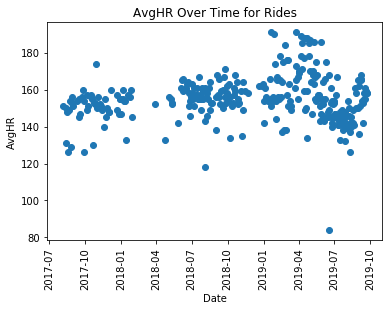

In [14]:
# Plot AvgHR over time for all virtual and outdoor bike rides
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot_date(df['Date'],df['AvgHR'])
plt.title('AvgHR Over Time for Rides')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AvgHR')
plt.show()

In [15]:
# Calculate sample size of each class
count_no_sub = len(df[df['AvgHR_bin']==1])
count_sub = len(df[df['AvgHR_bin']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of High AvgHR is", '%.2f' %(pct_of_no_sub*100))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Low AvgHR is", '%.2f' %(pct_of_sub*100))

percentage of High AvgHR is 52.75
percentage of Low AvgHR is 47.25


Text(0, 0.5, 'Frequency of Average HR')

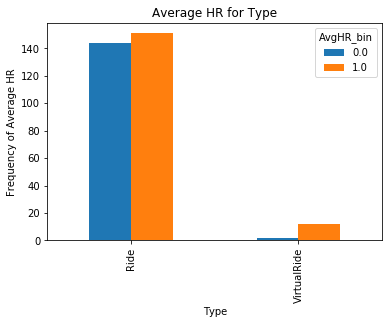

In [16]:
# Plot distribution of AvgHR for Rides and VirtualRides
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Type,df.AvgHR_bin).plot(kind='bar')
plt.title('Average HR for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Average HR')
#plt.savefig('purchase_avghr_type')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
# Define train and test set, perform RFE
window_size = 10
# removed Calories as feature since p-value was 0.07 > 0.05 (from below Logit function), as recommended
df_vars = ['Distance (km)', 'Avg Pace (/km)', 'HRSS', 'Elevation Gain (m)','AvgHR']
df_final = df[df_vars]
df_final_vars=df_final.columns.values.tolist()
y=df_final.AvgHR
X=[i for i in df_final_vars if i not in y]

X = df_final.loc[:, df_final.columns != 'AvgHR']
y = df_final.loc[:, df_final.columns == 'AvgHR']

# Configure train and test sets
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]

X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print(X_test, y_test)

# Perform RFE (recursive feature elimination) to determine ranking of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

   Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0           62.5             113   144               589.0
1           80.1             125   217               890.0
2           35.2             116    87               314.0
3           45.6             114   119               447.0
4           41.1             120    96               454.0
5           61.4             122   146               692.0
6           81.0             129   225              1096.0
7           51.4             128    90               576.0
8           55.4             114   116               502.0
9           47.2             116   106               447.0    AvgHR
0    158
1    158
2    159
3    161
4    155
5    155
6    158
7    142
8    153
9    154
[ True  True  True  True]
[1 1 1 1]


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
# Implement Logit model to determine p-values and coefficients for each feature
# import statsmodels
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())

## Gradient Boosting

### Implement Gradient Boosting with LOO and window size = 299

In [20]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

window_size = 10
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

actuals = pd.DataFrame(y_test)
actuals = actuals.rename(columns={'AvgHR':'Actuals'})
# print('actuals: \n', actuals)
preds = np.zeros(X_test.shape[0])
# print('X_test: \n', X_test)

for i in range(0,y_test.shape[0]):
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    # Fit model
    clf.fit(X_train, y_train.values.ravel())
    # Predict test set
    y_pred = clf.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
    # Compute mean squared error
    mse = mean_squared_error(y_test.iloc[-1], y_pred)
    print('actual: ',y_test.iloc[-1], '\n pred: ',y_pred, '\n')
    preds[i] = y_pred
    print('mse: ', mse)
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    # Perform LOO cross-validation
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR"])
    #print("X test inst: ", X_test_inst)
    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train])
    y_train = y_train.reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test.index[-1])
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test.index[-1])
    y_test = y_test.reset_index(drop=True)

preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
preds_act_df = preds_act_df.join(actuals)
print('actuals and preds: \n', preds_act_df)
final_mse = metrics.mean_squared_error(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
print('mse for window size {}: {}'.format(window_size, final_mse))


# Predictions:  10
Window Size:  299
train labels:       AvgHR
10     168
11     165
12     166
13     151
14     162
..     ...
304    149
305    148
306    150
307    131
308    151

[299 rows x 1 columns]
test labels:     AvgHR
0    158
1    158
2    159
3    161
4    155
5    155
6    158
7    142
8    153
9    154
Iteration:  0
X train shape:  299
X test shape:  10
actual:  AvgHR    154
Name: 9, dtype: int64 
 pred:  [155.56509123] 

mse:  2.449510571825972
Iteration:  1
X train shape:  299
X test shape:  9
actual:  AvgHR    153
Name: 8, dtype: int64 
 pred:  [155.63401368] 

mse:  6.938028085488704
Iteration:  2
X train shape:  299
X test shape:  8
actual:  AvgHR    142
Name: 7, dtype: int64 
 pred:  [149.41845746] 

mse:  55.03351112055058
Iteration:  3
X train shape:  299
X test shape:  7
actual:  AvgHR    158
Name: 6, dtype: int64 
 pred:  [155.82144515] 

mse:  4.7461012390277695
Iteration:  4
X train shape:  299
X test shape:  6
actual:  AvgHR    155
Name: 5, dtype: int64 
 

### Iterate Over All Window Sizes for GB

In [34]:
# Iterate over all window sizes to determine optimal size
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change window_size_optimization flag to perform iterations
window_size_optimization = False

if window_size_optimization == True:

    # Fit regression model
    params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
              'learning_rate': 0.01, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)
    
    accuracies = np.zeros(276)
    mses = np.zeros(276)
    #298 accuracy indices

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,277):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # Fit model
            clf.fit(X_train, y_train.values.ravel())
            # Predict test set
            y_pred = clf.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
            preds[i] = y_pred
            # Compute mean squared error
            mse = mean_squared_error(y_test.iloc[-1], y_pred)
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            #print("X test -1: ", X_test.iloc[-1])
            
            # Perform LOO cross-validation and add window of test instances to X_train, y_train
            X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
            y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR"])
            #print("X test inst: ", X_test_inst)
            X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
            X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
            #print("X train: \n", X_train)

            y_train = y_train.drop(y_train.index[-1])
            y_train = pd.concat([y_test_inst,y_train])
            y_train = y_train.reset_index(drop=True)
            #print("y train \n", y_train)

            X_test = X_test.drop(X_test.index[-1])
            X_test = X_test.reset_index(drop=True)
            #print("X test: \n", X_test)
            y_test = y_test.drop(y_test.index[-1])
            y_test = y_test.reset_index(drop=True)
            
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df.join(actuals)
        # print('actuals and preds: \n', preds_act_df)
        #accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        mse_final = metrics.mean_squared_error(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('mse for window size {}: {}'.format(309-window_size, mse_final))
        #accuracies[window_size-1] = accuracy
        mses[window_size-1] = mse_final
    #print('Accuracies: ', accuracies)
    print('mses: ', mses)
    # Output accuracies for each window size to Accuracies_for_Window_Size_Variations.csv file 
    with open('GB_Accuracies_for_Window_Size_Variations.csv', 'w') as f:
        for i in range(0,len(mses)):
            f.write(str(308-i) + ': ' + str(mses[i]))
            f.write('\n')

In [33]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('GB_Accuracies_for_Window_Size_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = float(row[0].split(':')[1])
print(mylist.sort_values('Accuracy', 0,ascending=True))

FileNotFoundError: [Errno 2] No such file or directory: 'GB_Accuracies_for_Window_Size_Variations.csv'

### Iterate Over All Look Ahead Values for GB

In [25]:
import numpy as np
import math
import statistics as stats
# Run GB with optimal window size of 302 (# predictions = 7) for all look ahead values from 1 to 7

window_size = 7 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
avg_mses = np.zeros(window_size)

for m in range(1,window_size+1):
    # train set
    X_train = X.iloc[window_size:]
    y_train = y.iloc[window_size:]
    #print('train labels: ', y_train)
    # test set
    X_test = X.iloc[:window_size]
    y_test = y.iloc[:window_size]
    #print('test labels: ', y_test)
    
    #look_ahead = 7
    look_ahead=m
    print("\n\nlook ahead: ", m)
    print("# iterations: ", math.ceil(y_test.shape[0]/look_ahead))
    
    mses = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

    for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
        preds = np.zeros(min(look_ahead,y_test.shape[0]))
        actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
        # print('Iteration: ', i)
        # print('X train shape: ', X_train.shape[0])
        # print('X test shape: ', y_test.shape[0])
        # Fit model
        clf.fit(X_train, y_train.values.ravel())
        # Predict test set
        for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            y_pred = clf.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
            # print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
            preds[j-1] = y_pred
            actuals_look_ahead[j-1] = y_test.iloc[-j]
        
        # Perform cross-validation and add window of test instances to X_train, y_train
        #print("X test -1: ", X_test.iloc[-1])
        X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
        y_test_inst = pd.DataFrame(columns=["AvgHR"])
        for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            X_test_inst = X_test_inst.append(X_test.iloc[-k])
            y_test_inst = y_test_inst.append(y_test.iloc[-k])        
        #print("X test inst: ", X_test_inst)

        #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
        X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
        #print("X train: \n", X_train)

        #y_train = y_train.drop(y_train.index[-1])
        y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
        #print("y train \n", y_train)

        X_test = X_test.drop(X_test_inst.index.values)
        X_test = X_test.reset_index(drop=True)
        #print("X test: \n", X_test)

        y_test = y_test.drop(y_test_inst.index.values)
        y_test = y_test.reset_index(drop=True)

        preds_act_df = pd.DataFrame(preds)
        act_df = pd.DataFrame(actuals_look_ahead)
        print("predictions: ", preds)
        print("actuals: ", actuals_look_ahead)
     
        # Compute mean squared error
        mse = metrics.mean_squared_error(preds,actuals_look_ahead)
    
        mses[i] = mse
    
    print('mses: ', mses)
    avg_mse = stats.mean(mses)
    print('avg mse: ', avg_mse)
    avg_mses[m-1] = avg_mse

avg_acc_df = pd.DataFrame(data=avg_mses, columns=['Avg MSE'])
print('Averages: ', avg_acc_df) 


# Predictions:  7
Window Size:  302


look ahead:  1
# iterations:  7
predictions:  [155.73537003]
actuals:  [158.]
predictions:  [158.73157508]
actuals:  [155.]
predictions:  [154.38306507]
actuals:  [155.]
predictions:  [158.2766407]
actuals:  [161.]
predictions:  [155.8541708]
actuals:  [159.]
predictions:  [156.62636066]
actuals:  [158.]
predictions:  [157.00438902]
actuals:  [158.]
mses:  [ 5.12854891 13.92465258  0.38060871  7.41668588  9.89624138  1.88688502
  0.99124123]
avg mse:  5.660694816497746


look ahead:  2
# iterations:  4
predictions:  [155.73537003 159.13374524]
actuals:  [158. 155.]
predictions:  [154.38306507 158.49671894]
actuals:  [155. 161.]
predictions:  [155.8541708  156.59086728]
actuals:  [159. 158.]
predictions:  [157.00438902]
actuals:  [158.]
mses:  [11.10819931  3.32351239  5.9409482   0.99124123]
avg mse:  5.340975282637976


look ahead:  3
# iterations:  3
predictions:  [155.73537003 159.13374524 154.35583219]
actuals:  [158. 155. 155.]
predictions:  [

### GB with Optimal Window Size = 302 and Look Ahead = 5

In [26]:
import numpy as np
import math
import statistics as stats
# Run GB with optimal window size of 302 (# predictions = 7) and optimal look ahead = 5

window_size = 7 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 5

mses = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

# print('X_test: \n', X_test)

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    clf.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = clf.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        actuals_look_ahead[j-1] = y_test.iloc[-j]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    #y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    mse = metrics.mean_squared_error(preds,actuals_look_ahead)
    mses[i] = mse
    print('mse for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, mse))
    
#print('accuracies: ', accuracies)
#print('avg accuracy: ', stats.mean(accuracies))
# preds_act_df = pd.DataFrame(preds)
# preds_act_df = preds_act_df.join(actuals)
# print('actuals and preds: \n', preds_act_df)
# accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
# print('accuracy for window size {}: {}'.format(window_size, accuracy))

# Predictions:  7
Window Size:  302
train labels:       AvgHR
7      142
8      153
9      154
10     168
11     165
12     166
13     151
14     162
15     136
16     150
17     165
18     150
19     158
20     161
21     141
22     142
23     149
24     142
25     145
26     140
27     126
28     142
29     137
30     146
31     150
32     154
33     139
34     141
35     148
36     145
37     132
38     143
39     141
40     138
41     142
42     149
43     148
44     145
45     148
46     142
47     133
48     143
49     141
50     141
51     144
52     167
53     157
54     147
55     147
56     154
57     153
58     145
59     152
60     140
61     154
62     142
63     145
64     153
65     161
66     149
67      84
68     168
69     148
70     145
71     175
72     155
73     166
74     143
75     146
76     164
77     152
78     155
79     152
80     186
81     147
82     143
83     151
84     157
85     157
86     156
87     155
88     168
89     154
90     175
91     155
92 

In [23]:
import numpy as np
import math
import statistics as stats
from sklearn.ensemble import RandomForestRegressor
# Run GB with optimal window size of 302 (# predictions = 7) and optimal look ahead = 5

window_size = 7 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 5

mses = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

# print('X_test: \n', X_test)

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    clf = RandomForestRegressor(n_estimators=100)
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    clf.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = clf.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        actuals_look_ahead[j-1] = y_test.iloc[-j]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    #y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    preds_act_df = preds_act_df.join(actuals.iloc[::-1].reset_index(drop = True))
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    mse = metrics.mean_squared_error(preds,actuals_look_ahead)
    mses[i] = mse
    print('mse for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, mse))
    
#print('accuracies: ', accuracies)
#print('avg accuracy: ', stats.mean(accuracies))
# preds_act_df = pd.DataFrame(preds)
# preds_act_df = preds_act_df.join(actuals)
# print('actuals and preds: \n', preds_act_df)
# accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
# print('accuracy for window size {}: {}'.format(window_size, accuracy))

# Predictions:  7
Window Size:  302
train labels:       AvgHR
7      142
8      153
9      154
10     168
11     165
12     166
13     151
14     162
15     136
16     150
17     165
18     150
19     158
20     161
21     141
22     142
23     149
24     142
25     145
26     140
27     126
28     142
29     137
30     146
31     150
32     154
33     139
34     141
35     148
36     145
37     132
38     143
39     141
40     138
41     142
42     149
43     148
44     145
45     148
46     142
47     133
48     143
49     141
50     141
51     144
52     167
53     157
54     147
55     147
56     154
57     153
58     145
59     152
60     140
61     154
62     142
63     145
64     153
65     161
66     149
67      84
68     168
69     148
70     145
71     175
72     155
73     166
74     143
75     146
76     164
77     152
78     155
79     152
80     186
81     147
82     143
83     151
84     157
85     157
86     156
87     155
88     168
89     154
90     175
91     155
92 

In [35]:
# Iterate over all window sizes to determine optimal size
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change window_size_optimization flag to perform iterations
window_size_optimization = False

if window_size_optimization == True:

    # Fit regression model
    params = {'n_estimators': 100}
    clf = ensemble.RandomForestRegressor(**params)
    
    accuracies = np.zeros(276)
    mses = np.zeros(276)
    #298 accuracy indices

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,277):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # Fit model
            clf.fit(X_train, y_train.values.ravel())
            # Predict test set
            y_pred = clf.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
            preds[i] = y_pred
            # Compute mean squared error
            mse = mean_squared_error(y_test.iloc[-1], y_pred)
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            #print("X test -1: ", X_test.iloc[-1])
            
            # Perform LOO cross-validation and add window of test instances to X_train, y_train
            X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
            y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR"])
            #print("X test inst: ", X_test_inst)
            X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
            X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
            #print("X train: \n", X_train)

            y_train = y_train.drop(y_train.index[-1])
            y_train = pd.concat([y_test_inst,y_train])
            y_train = y_train.reset_index(drop=True)
            #print("y train \n", y_train)

            X_test = X_test.drop(X_test.index[-1])
            X_test = X_test.reset_index(drop=True)
            #print("X test: \n", X_test)
            y_test = y_test.drop(y_test.index[-1])
            y_test = y_test.reset_index(drop=True)
            
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df.join(actuals)
        # print('actuals and preds: \n', preds_act_df)
        #accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        mse_final = metrics.mean_squared_error(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('mse for window size {}: {}'.format(309-window_size, mse_final))
        #accuracies[window_size-1] = accuracy
        mses[window_size-1] = mse_final
    #print('Accuracies: ', accuracies)
    print('mses: ', mses)
    # Output accuracies for each window size to Accuracies_for_Window_Size_Variations.csv file 
    with open('Forest_Accuracies_for_Window_Size_Variations.csv', 'w') as f:
        for i in range(0,len(mses)):
            f.write(str(308-i) + ': ' + str(mses[i]))
            f.write('\n')

# Predictions:  1
mse for window size 308: 0.7056000000000058
# Predictions:  2
mse for window size 307: 0.6565000000000041
# Predictions:  3
mse for window size 306: 0.7718000000000127
# Predictions:  4
mse for window size 305: 3.276224999999991
# Predictions:  5
mse for window size 304: 10.921039999999953
# Predictions:  6
mse for window size 303: 8.490583333333324
# Predictions:  7
mse for window size 302: 8.062057142857139
# Predictions:  8
mse for window size 301: 63.78115
# Predictions:  9
mse for window size 300: 43.44895555555553
# Predictions:  10
mse for window size 299: 46.40897999999997
# Predictions:  11
mse for window size 298: 56.166672727272754
# Predictions:  12
mse for window size 297: 37.344533333333345
# Predictions:  13
mse for window size 296: 56.00380000000004
# Predictions:  14
mse for window size 295: 91.40362857142854
# Predictions:  15
mse for window size 294: 64.14515333333331
# Predictions:  16
mse for window size 293: 121.26184374999997
# Predictions:  17


In [21]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('Forest_Accuracies_for_Window_Size_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = float(row[0].split(':')[1])
print(mylist.sort_values('Accuracy', 0,ascending=True))

    Window Accuracy
1      307   0.6565
0      308   0.7056
2      306   0.7718
3      305  3.27622
6      302  8.06206
5      303  8.49058
4      304   10.921
11     297  37.3445
8      300   43.449
9      299   46.409
12     296  56.0038
10     298  56.1667
7      301  63.7811
14     294  64.1452
20     288  64.3854
22     286  73.7469
13     295  91.4036
62     246   102.51
64     244  107.988
63     245  114.326
66     242  116.622
23     285  119.523
15     293  121.262
61     247  126.812
19     289  126.942
16     292  127.082
65     243  127.815
21     287  128.193
55     253  133.111
17     291  136.885
18     290  143.823
60     248  146.129
88     220  146.903
54     254  151.709
82     226  152.678
58     250  153.095
53     255  154.813
59     249  155.834
52     256  156.206
56     252  157.615
31     277  157.925
71     237  158.026
74     234  162.028
73     235  164.023
85     223  165.305
90     218  167.231
91     217  168.026
28     280  168.535
76     232  169.292


In [24]:
import numpy as np
import math
import statistics as stats
# Run GB with optimal window size of 302 (# predictions = 7) for all look ahead values from 1 to 7

window_size = 7 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
avg_mses = np.zeros(window_size)

clf = RandomForestRegressor(n_estimators=100)

for m in range(1,window_size+1):
    # train set
    X_train = X.iloc[window_size:]
    y_train = y.iloc[window_size:]
    #print('train labels: ', y_train)
    # test set
    X_test = X.iloc[:window_size]
    y_test = y.iloc[:window_size]
    #print('test labels: ', y_test)
    
    #look_ahead = 7
    look_ahead=m
    print("\n\nlook ahead: ", m)
    print("# iterations: ", math.ceil(y_test.shape[0]/look_ahead))
    
    mses = np.zeros(math.ceil(y_test.shape[0]/look_ahead))

    for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
        preds = np.zeros(min(look_ahead,y_test.shape[0]))
        actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
        # print('Iteration: ', i)
        # print('X train shape: ', X_train.shape[0])
        # print('X test shape: ', y_test.shape[0])
        # Fit model
        clf.fit(X_train, y_train.values.ravel())
        # Predict test set
        for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            y_pred = clf.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
            # print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
            preds[j-1] = y_pred
            actuals_look_ahead[j-1] = y_test.iloc[-j]
        
        # Perform cross-validation and add window of test instances to X_train, y_train
        #print("X test -1: ", X_test.iloc[-1])
        X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
        y_test_inst = pd.DataFrame(columns=["AvgHR"])
        for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            X_test_inst = X_test_inst.append(X_test.iloc[-k])
            y_test_inst = y_test_inst.append(y_test.iloc[-k])        
        #print("X test inst: ", X_test_inst)

        #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
        X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
        #print("X train: \n", X_train)

        #y_train = y_train.drop(y_train.index[-1])
        y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
        #print("y train \n", y_train)

        X_test = X_test.drop(X_test_inst.index.values)
        X_test = X_test.reset_index(drop=True)
        #print("X test: \n", X_test)

        y_test = y_test.drop(y_test_inst.index.values)
        y_test = y_test.reset_index(drop=True)

        preds_act_df = pd.DataFrame(preds)
        act_df = pd.DataFrame(actuals_look_ahead)
        print("predictions: ", preds)
        print("actuals: ", actuals_look_ahead)
     
        # Compute mean squared error
        mse = metrics.mean_squared_error(preds,actuals_look_ahead)
    
        mses[i] = mse
    
    print('mses: ', mses)
    avg_mse = stats.mean(mses)
    print('avg mse: ', avg_mse)
    avg_mses[m-1] = avg_mse

avg_acc_df = pd.DataFrame(data=avg_mses, columns=['Avg MSE'])
print('Averages: ', avg_acc_df) 

# Predictions:  7
Window Size:  302


look ahead:  1
# iterations:  7
predictions:  [156.06]
actuals:  [158.]
predictions:  [159.33]
actuals:  [155.]
predictions:  [153.52]
actuals:  [155.]
predictions:  [158.08]
actuals:  [161.]
predictions:  [157.73]
actuals:  [159.]
predictions:  [156.81]
actuals:  [158.]
predictions:  [159.76]
actuals:  [158.]
mses:  [ 3.7636 18.7489  2.1904  8.5264  1.6129  1.4161  3.0976]
avg mse:  5.622271428571427


look ahead:  2
# iterations:  4
predictions:  [156.06 159.57]
actuals:  [158. 155.]
predictions:  [153.22 157.97]
actuals:  [155. 161.]
predictions:  [157.83 157.2 ]
actuals:  [159. 158.]
predictions:  [158.38]
actuals:  [158.]
mses:  [12.32425  6.17465  1.00445  0.1444 ]
avg mse:  4.91193749999999


look ahead:  3
# iterations:  3
predictions:  [155.94 158.28 154.11]
actuals:  [158. 155. 155.]
predictions:  [157.02 157.33 157.21]
actuals:  [161. 159. 158.]
predictions:  [158.95]
actuals:  [158.]
mses:  [5.2647 6.4178 0.9025]
avg mse:  4.19499999999